In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

#Loading your csv file
df=pd.read_csv("books_of_the_decade.csv")

In [3]:
#looking head and tail of the data
df.head()

,Index,Book Name,Author,Rating,Number of Votes,Score
0,1,The Invisible Life of Addie LaRue,Victoria Schwab,4.18,"1,184,531",62443
1,2,The House in the Cerulean Sea (Cerulean Chroni...,T.J. Klune,4.40,"718,243",47323
2,3,Project Hail Mary,Andy Weir,4.51,"657,869",45972
3,4,The Midnight Library,Matt Haig,3.99,"1,967,348",42746
4,5,I'm Glad My Mom Died,Jennette McCurdy,4.46,"1,151,831",37509


In [4]:
df.tail()

,Index,Book Name,Author,Rating,Number of Votes,Score
2324,2325,"Unholy Terrors (Scarlett Force, #2)",C.M. Stunich,4.49,"3,764",4
2325,2326,What Happened to the Bennetts,Lisa Scottoline,3.80,"73,552",4
2326,2327,Troubled: The Failed Promise of America's Beha...,Kenneth R. Rosen,3.48,430,3
2327,2328,The Foundling,Ann Leary,3.89,"12,851",3
2328,2329,The Mermaid from Jeju,Sumi Hahn,3.89,"3,774",2


In [5]:
df.shape


(2329, 6)

In [6]:
#analyzing the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Index            2329 non-null   int64 
 1   Book Name        2329 non-null   object
 2   Author           2329 non-null   object
 3   Rating           2329 non-null   object
 4   Number of Votes  2329 non-null   object
 5   Score            2329 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 109.3+ KB


In [7]:
df.isnull().sum()

Index              0
Book Name          0
Author             0
Rating             0
Number of Votes    0
Score              0
dtype: int64

In [8]:
#percentage
df.isnull().sum()/df.shape[0]*100

Index              0.0
Book Name          0.0
Author             0.0
Rating             0.0
Number of Votes    0.0
Score              0.0
dtype: float64

In [9]:
#finding the duplicates
df.duplicated().sum()


0

In [10]:
df.describe()

,Index,Score
count,2329.000000,2329.000000
mean,1165.000000,597.599399
std,672.468711,2947.850623
min,1.000000,2.000000
25%,583.000000,79.000000
50%,1165.000000,97.000000
75%,1747.000000,195.000000
max,2329.000000,62443.000000


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,2329.0,1165.000000,672.468711,1.0,583.0,1165.0,1747.0,2329.0
Score,2329.0,597.599399,2947.850623,2.0,79.0,97.0,195.0,62443.0


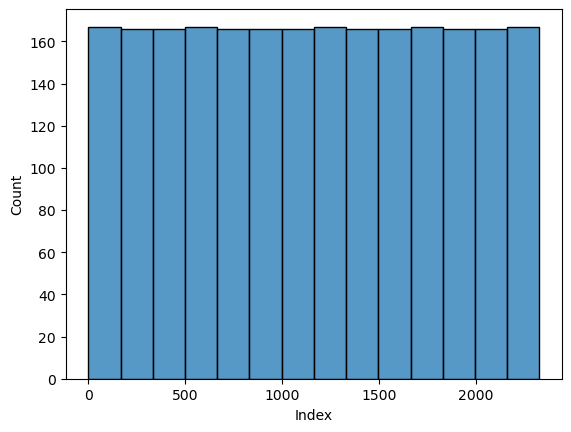

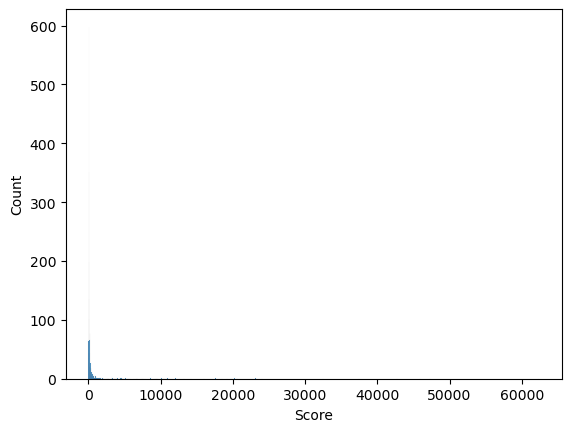

In [12]:
#getting visual representation of data using 
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

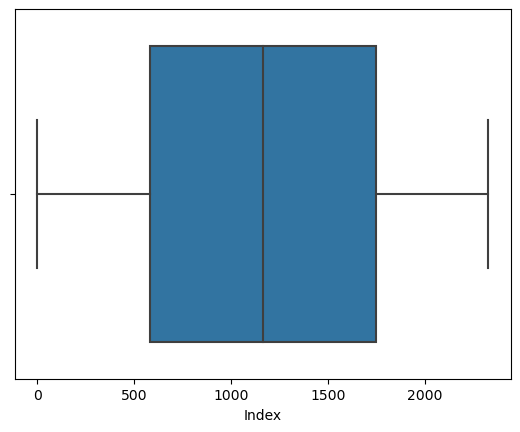

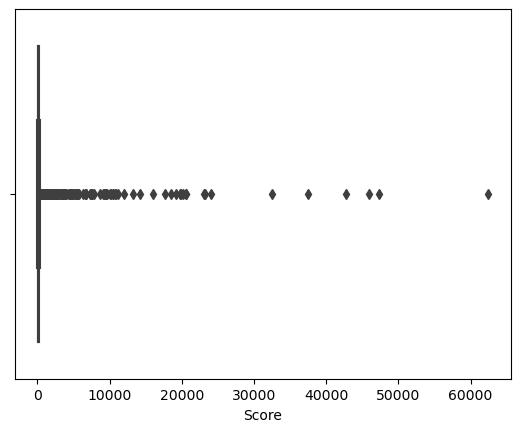

In [13]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [14]:
df.select_dtypes(include="number").columns

Index(['Index', 'Score'], dtype='object')

In [15]:
# Convert 'Rating' and 'Number of Votes' to numeric types, handling errors
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Number of Votes'] = pd.to_numeric(df['Number of Votes'].str.replace(',', ''), errors='coerce')

# Fill missing values in 'Rating' and 'Number of Votes' with their respective median values
df['Rating'].fillna(df['Rating'].median(), inplace=True)
df['Number of Votes'].fillna(df['Number of Votes'].median(), inplace=True)


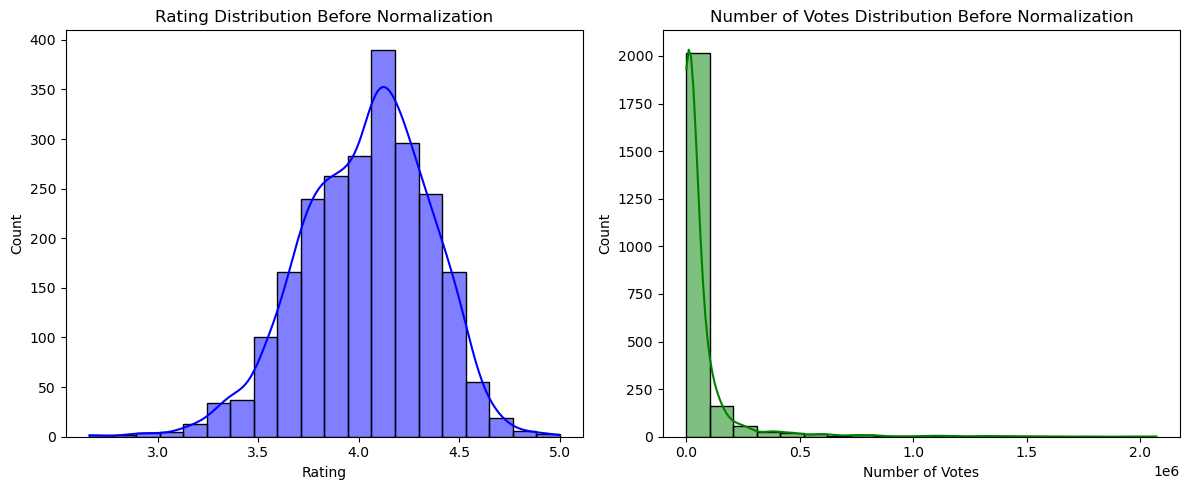

In [16]:
# Step 3: Data Visualization before Normalization
# -----------------------------------------------
# Plot the distributions of 'Rating' and 'Number of Votes' before scaling

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Rating'], bins=20, kde=True, color='blue')
plt.title('Rating Distribution Before Normalization')

plt.subplot(1, 2, 2)
sns.histplot(df['Number of Votes'], bins=20, kde=True, color='green')
plt.title('Number of Votes Distribution Before Normalization')

plt.tight_layout()
plt.show()

In [17]:
# Step 4: Manual Normalization (Min-Max Scaling)
# ----------------------------------------------
# Normalize 'Rating' and 'Number of Votes' using the formula: (value - min) / (max - min)
df['Rating'] = (df['Rating'] - df['Rating'].min()) / (df['Rating'].max() - df['Rating'].min())
df['Number of Votes'] = (df['Number of Votes'] - df['Number of Votes'].min()) / (df['Number of Votes'].max() - df['Number of Votes'].min())


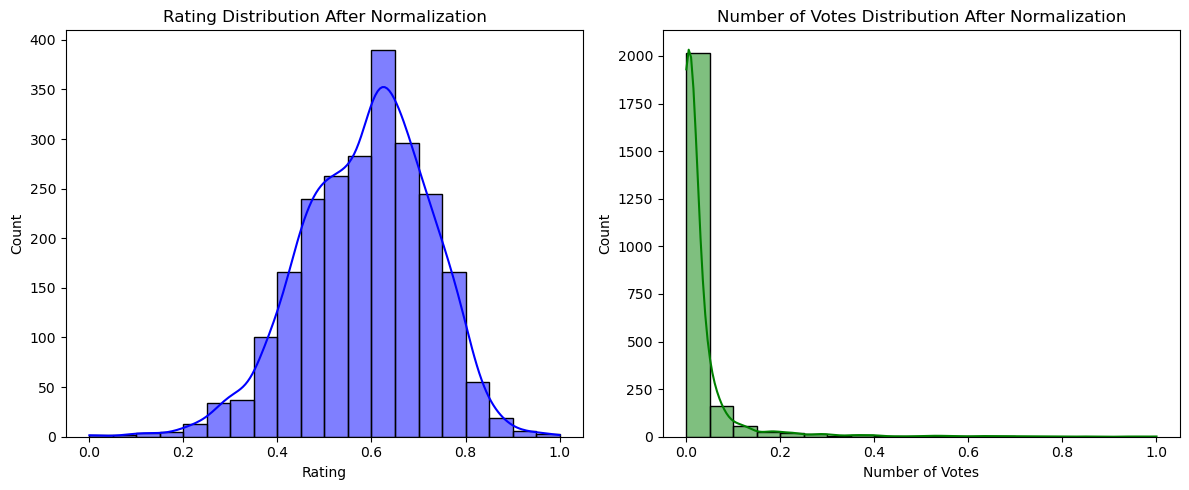

In [18]:
# Step 5: Data Visualization after Normalization
# ----------------------------------------------
# Plot the distributions of 'Rating' and 'Number of Votes' after scaling
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Rating'], bins=20, kde=True, color='blue')
plt.title('Rating Distribution After Normalization')

plt.subplot(1, 2, 2)
sns.histplot(df['Number of Votes'], bins=20, kde=True, color='green')
plt.title('Number of Votes Distribution After Normalization')

plt.tight_layout()
plt.show()

In [19]:
 # Step 7: Data Reduction
# ----------------------
# Remove the 'Score' column if it's considered less useful
df = df.drop(columns=['Score'])

In [20]:
# Step 8: Outlier Detection
# -------------------------
# Identifying outliers in 'Rating' using the Interquartile Range (IQR) method
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Marking outliers in a new column 'Outlier_Rating' where True indicates an outlier
df['Outlier_Rating'] = (df['Rating'] < lower_bound) | (df['Rating'] > upper_bound)